In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
from glob import glob
%matplotlib inline

In [2]:
# loading image
data = np.load('data/gender_flat_64_new.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
x = data['arr_0']
y = data['arr_1']
# 0 = male, 1 = female

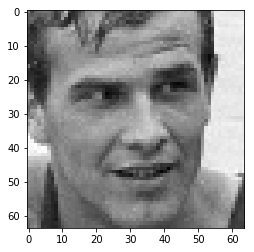

In [5]:
img = x[7:8].reshape(64,64)
plt.imshow(img,cmap='gray')

In [6]:
# normalize images 
x_norm = x/x.max()

In [8]:
# Eigen Image (feature extraction)
from sklearn.decomposition import PCA
pca = PCA(whiten=True)

In [ ]:
x_pca = pca.fit_transform(x_norm)

In [ ]:
# explained variance
evr = pca.explained_variance_ratio_
cum_evr = np.cumsum(evr)

In [ ]:
# identify optimal number of components using elbow method
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(evr[:200],'rs--')
plt.subplot(1,2,2)
plt.plot(cum_evr[:200],'rs--')
plt.ylabel('R_Square')

In [9]:
# selecting 25 components
pca_40 = PCA(n_components=40,whiten=True,svd_solver='full') # using elbow method
x_pca_40 = pca_40.fit_transform(x_norm)

In [11]:
x_pca_40.shape

(8136, 40)

In [12]:
# visualize eigen images
eigne_images = pca_40.inverse_transform(x_pca_40)

In [13]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'

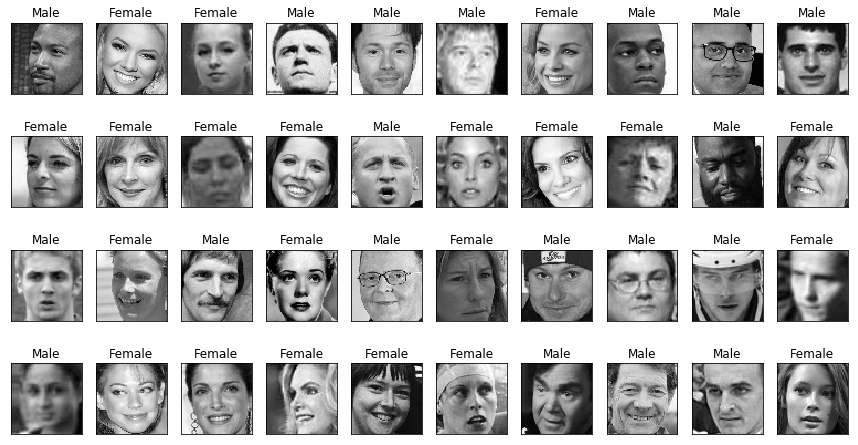

====================Eigen Images====================


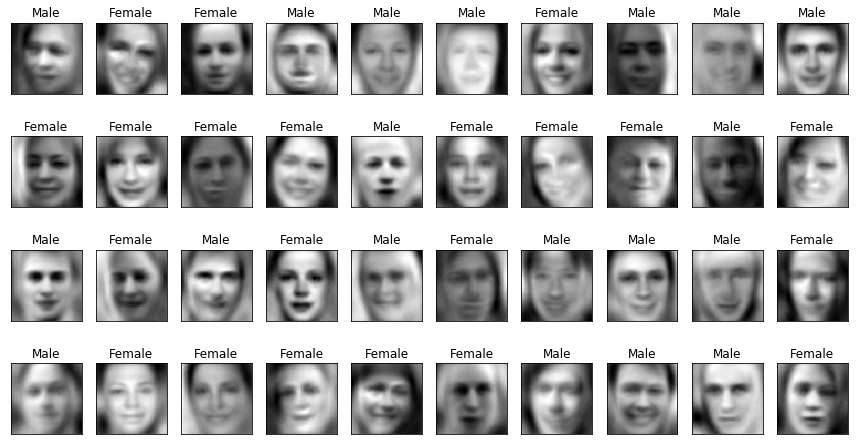

In [15]:
np.random.randint(1001)
pics = np.random.randint(0,8136,40)

plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):

    plt.subplot(4,10,i+1)
    img = x_norm[pic:pic+1].reshape(64,64)
    
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

print("="*20+'Eigen Images'+"="*20)
    
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):

    plt.subplot(4,10,i+1)
    img = eigne_images[pic:pic+1].reshape(64,64)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [18]:
# 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca_40,y,train_size=0.8,stratify=y)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6508, 40), (1628, 40), (6508,), (1628,))

In [20]:
from sklearn.svm import SVC

In [21]:
model_svm = SVC(C=5,gamma=0.01,class_weight='balanced',kernel='rbf')

In [22]:
model_svm.fit(x_train,y_train)

SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
model_svm.score(x_train,y_train)

0.8700061462814997

In [24]:
model_svm.score(x_test,y_test)

0.7757985257985258

In [25]:
from sklearn import metrics

In [26]:
y_pred = model_svm.predict(x_test)

In [27]:
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       691
         1.0       0.82      0.78      0.80       937

    accuracy                           0.78      1628
   macro avg       0.77      0.78      0.77      1628
weighted avg       0.78      0.78      0.78      1628



In [28]:
import pickle

In [29]:
pickle.dump(pca_40,open('pca_40.pkl','wb'))

In [30]:
pickle.dump(model_svm,open('model_svm.pkl','wb'))

In [145]:
from sklearn.model_selection import GridSearchCV


In [178]:
clf = SVC(class_weight='balanced')
parms = {'C':list(np.arange(0.1,50,5)),
         'kernel':['rbf'],
         'gamma':list(np.arange(0.001,1,0.1))}

In [179]:
grid_clf = GridSearchCV(clf,param_grid=parms,scoring='accuracy',cv=5,verbose=2)

In [180]:
grid_clf.fit(x_pca_25,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   2.9s
[CV] C=0.1, gamma=0.101, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.101, kernel=rbf, total=   3.1s
[CV] C=0.1, gamma=0.101, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.101, kernel=rbf, total=   3.1s
[CV] C=0.1, gamma=0.101, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.101, kernel=rbf, total=   3.1s
[CV] C=0.1, gamma=0.101, kernel=rbf ..................................
[CV] .

KeyboardInterrupt: 

In [ ]:
grid_clf.